# K-Means 

In [1]:
import os 
import sys 
from copy import deepcopy
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.utils import shuffle 
import random
import seaborn as sns
np.random.seed(seed=0)
# Set seed so that consistency is maintained and can debug properly 

## Data Pre-Processing/ Data Analysis

In [2]:
df = pd.read_csv('Iris.csv')
df.shape

(150, 6)

In [3]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.isna().count()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [8]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.drop('Id',axis=1,inplace=True)

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
scale_mapper = {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}

In [12]:
df["Species"]=df["Species"].replace(scale_mapper)

In [13]:
df.tail(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [14]:
data=df.values[:,:4]

In [15]:
classes=df.values[:,4]

## Algo

In [16]:
class Kmeans:
    def __init__(self, k = 5, num_of_iter = 10, dist_measure="euc"):
        self.k = k 
        self.num_of_iter = num_of_iter 
        self.centers = []
        self.clusters = {}
        self.d_measure = dist_measure 

        for i in range(k):
            self.clusters[i] = [] 
        
    def dist_measure(self, a, b):
        if self.d_measure == "euc" : 
            return np.sum((a-b)**2)

    def dist_array(self, data, centers):
        distance = np.array([[self.dist_measure(d, i) for i in centers] for d in data])
        return distance 

    def kmean_plus_plus(self, a, k):
        # using this to ensure smarter initialization of centroids 
        centers = [] 
        a = np.array(a) 
        centers.append(np.average(a, axis=0))
        for i in range(k-1):
            distance = self.dist_array(a, np.array(centers))
            if i == 0 :
                new_centroid =  a[np.random.choice(range(a.shape[0]), replace = False,)]
            else: 
                min_dist = [np.min(d) for d in distance]
                index = np.argmax(min_dist)
                new_centroid = a[index, :]
            centers.append(new_centroid.tolist())
        return centers

    def calc_clusters(self, a, y):
        clusters = {}
        for i in range(self.k):
            clusters[i] = []
        a = np.array(a) 
        for data, y in zip(a, y):
            distance = []
            for j in range(self.k):
                distance.append(self.dist_measure(data, self.centers[j])) 
            index = np.argmin(np.array(distance))
            clusters[index].append(np.append(data, np.array([index, y])))
        return clusters 

    def recalc_clusters(self):
        for i in range(self.k):
            self.centers[i] = np.average(np.array(self.clusters[i])[:,:-2], axis=0)
        return np.array(self.centers)

    def fin(self, a, y):
        self.centers = self.kmean_plus_plus(a, self.k)
        for i in range(self.num_of_iter):
            self.clusters = self.calc_clusters(a, y)
            self.centers = self.recalc_clusters()
            

In [47]:
clfd = Kmeans(k=3, num_of_iter=10)
clfd.fin(data, classes)

In [48]:
print("Printing the cluster means")
headings = ['Index', 'Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'] 
for h in headings:
     print(h, end="\t")
for a, i in enumerate(clfd.centers):
    print(a, end="\t")
    for j in i:
        print(round(j,2), end="\t\t")
    print("")

Printing the cluster means
Index	Sepal Length	Sepal Width	Petal Length	Petal Width	0	5.88		2.74		4.39		1.43		
1	6.85		3.08		5.72		2.05		
2	5.01		3.42		1.46		0.24		


In [49]:
colors=['red', 'blue', 'green']

In [50]:
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

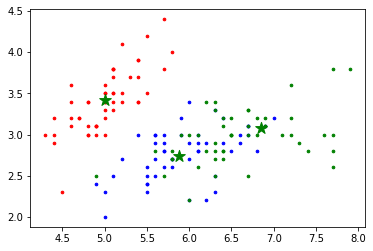

In [51]:
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(classes[i])])
plt.scatter(clfd.centers[:,0], clfd.centers[:,1], marker='*', c='g', s=150)

In [52]:
def vis_clusters(clfd, df, opt="Target"):
    ax = df[df[opt] == 0].plot.scatter(x=columns[2], y=columns[1], color= colors[0])
    df[df[opt] == 1].plot.scatter(x=columns[2], y=columns[1], color = colors[1], ax=ax)
    df[df[opt] == 2].plot.scatter(x=columns[2], y=columns[1], color= colors[2], ax=ax)
    ax.set_title(opt)

    for center in clfd.centers:
        plt.plot(center[2], center[1], color='yellow', marker='X', markersize=10) 
    plt.show()

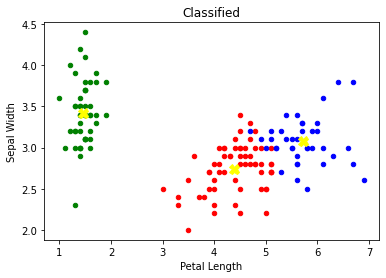

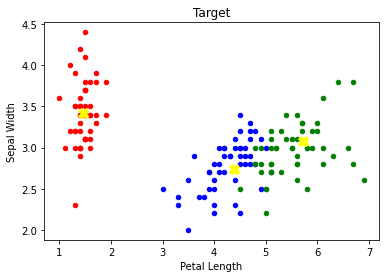

In [53]:
columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Classified', 'Target']
df = pd.DataFrame(columns=columns)

for key,value in clfd.clusters.items():
    for v in value:
        df.loc[0 if pd.isnull(df.index.max()) else df.index.max() + 1] = v

vis_clusters(clfd, df, "Classified")
vis_clusters(clfd, df, "Target")